# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("previsao_de_renda.csv")
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


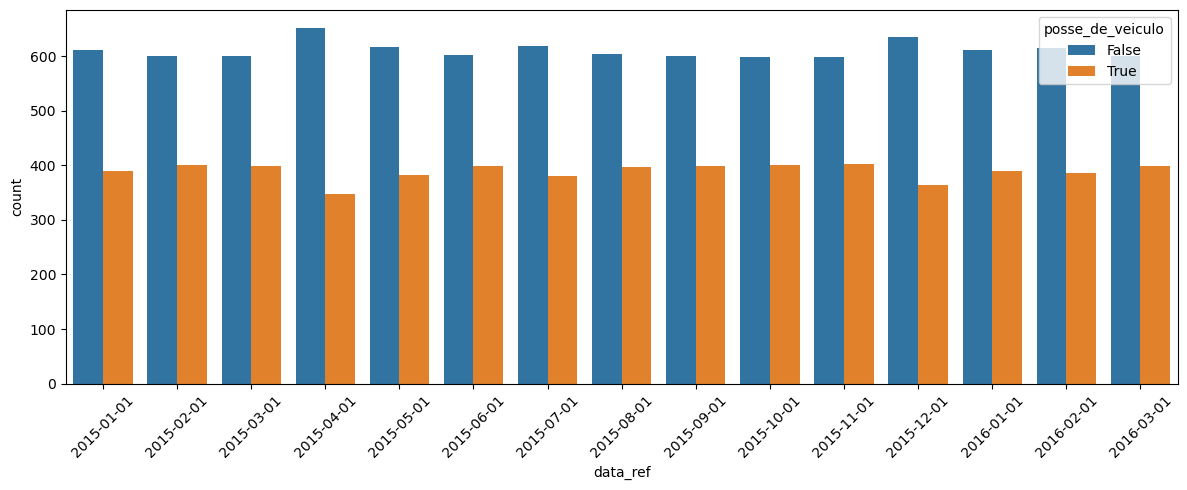

In [10]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(x='data_ref', hue='posse_de_veiculo', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



A proporção entre pessoas com e sem veículo permanece relativamente constante ao longo do tempo.

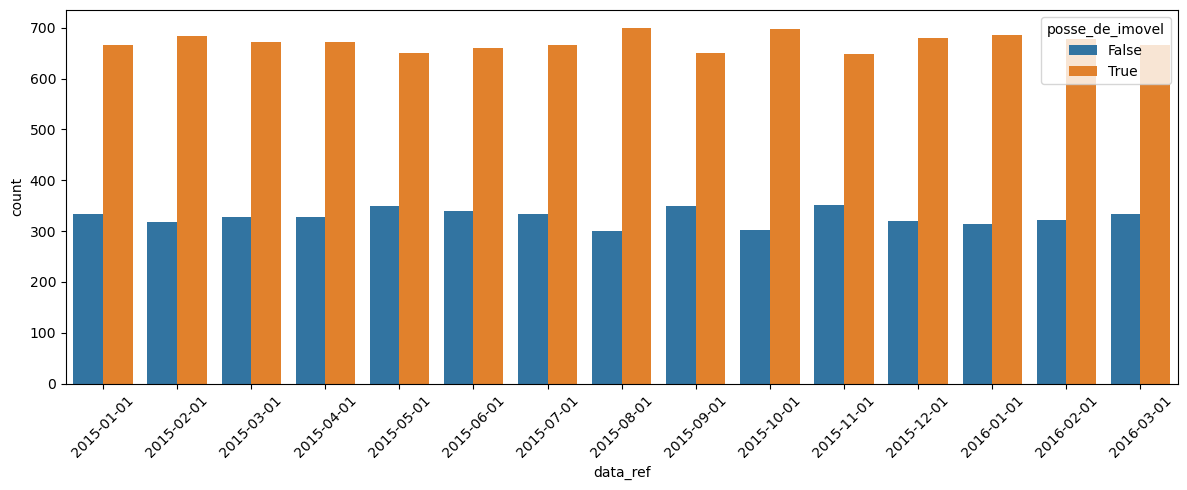

In [12]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(x='data_ref', hue='posse_de_imovel', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assim como a posse de veículo, a posse de imóvel se manteve relativamente estável.

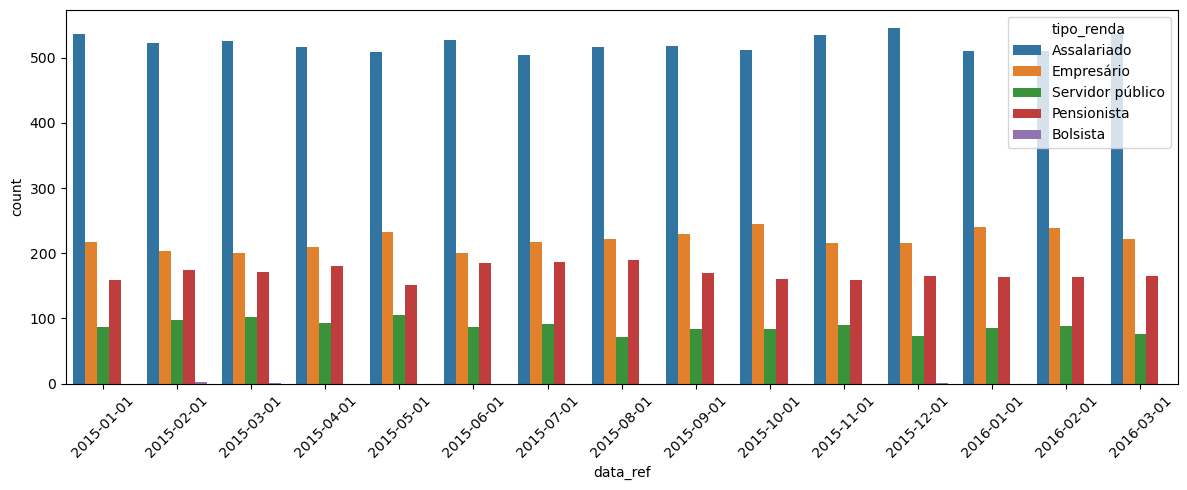

In [16]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(x='data_ref', hue='tipo_renda', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Embora “Assalariado” predomine, observa-se uma ligeira oscilação no número de “Empresários” e “Servidores públicos”.

A categoria “Bolsista” é pontual e rara, o que pode gerar ruído ou instabilidade na análise e talvez deva ser considerada com cautela na modelagem.

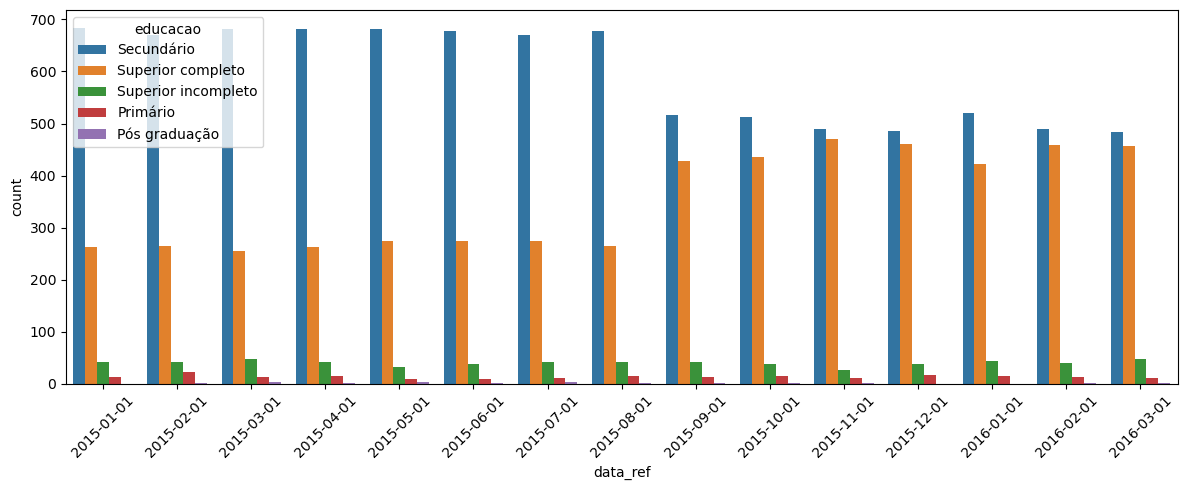

In [26]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(x='data_ref', hue='educacao', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A distribuição por escolaridade mostra que a maior parte da base é formada por pessoas com ensino secundário.

Há uma leve queda na proporção de pessoas com pós-graduação nos últimos meses, o que pode influenciar a média de renda geral.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

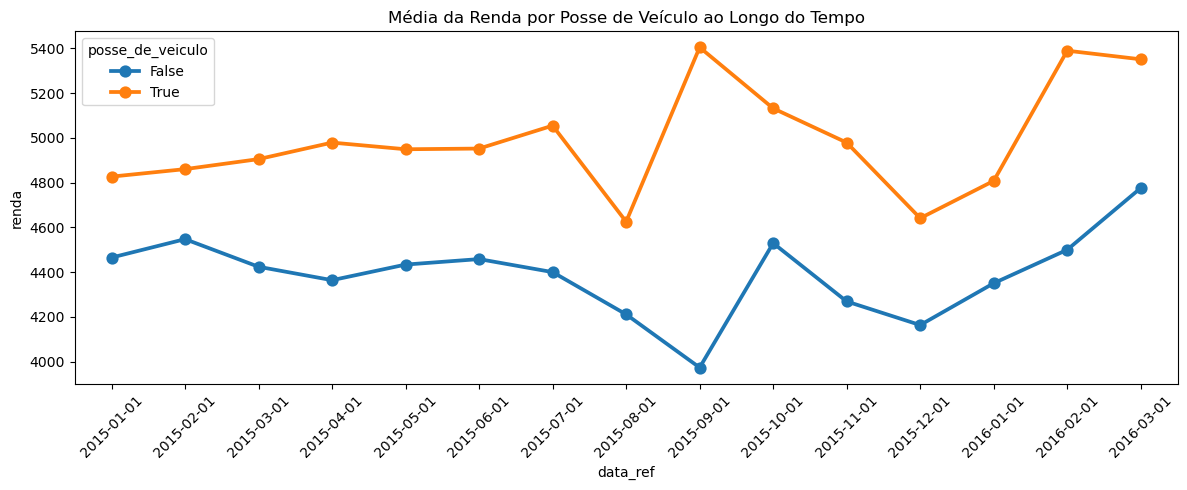

In [28]:
plt.figure(figsize=(12, 5))
sns.pointplot(data=df, x='data_ref', y='renda', hue='posse_de_veiculo', errorbar=None)
plt.title('Média da Renda por Posse de Veículo ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pessoas com veículo apresentaram uma renda média consistentemente superior ao longo do tempo.

Apesar de algumas oscilações naturais, a diferença entre os grupos parece estatisticamente estável, o que sugere que essa variável pode ser relevante como preditora da renda.

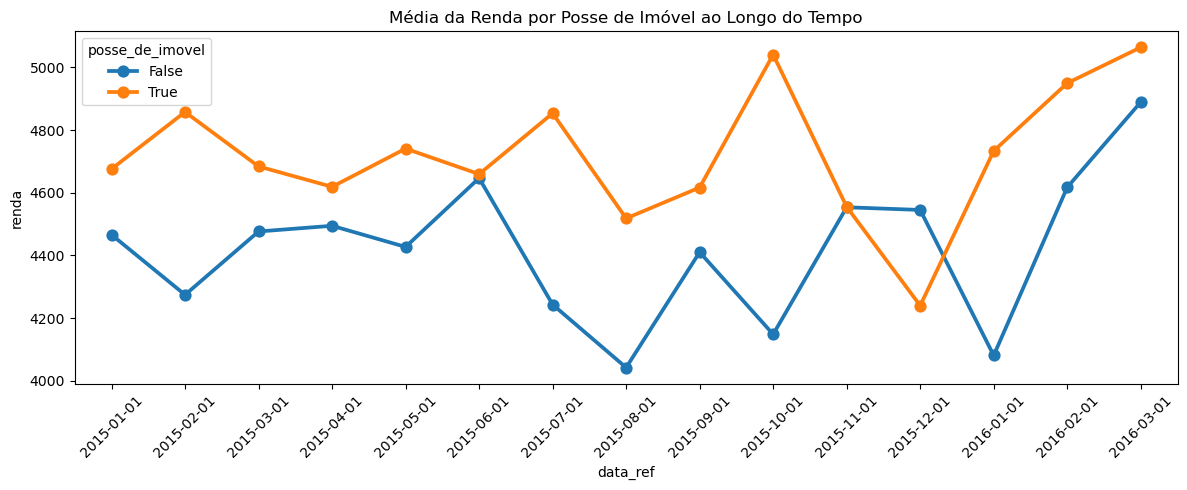

In [30]:
plt.figure(figsize=(12, 5))
sns.pointplot(data=df, x='data_ref', y='renda', hue='posse_de_imovel', errorbar=None)
plt.title('Média da Renda por Posse de Imóvel ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A renda média de quem possui imóvel também se mantém superior à de quem não possui, ainda que com menos diferença do que a posse de veículo.

A estabilidade ao longo do tempo também reforça a relevância dessa variável na modelagem.

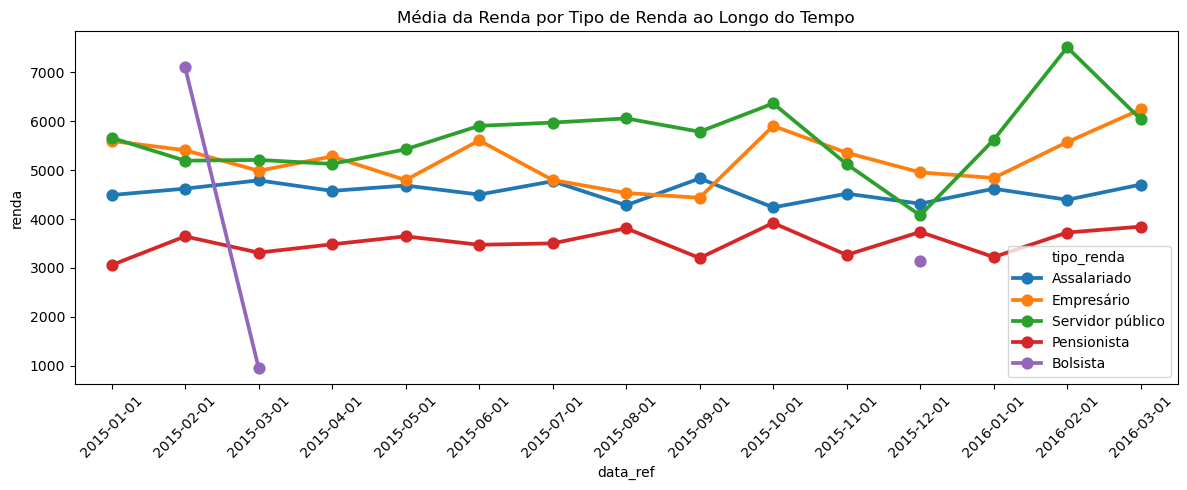

In [32]:
plt.figure(figsize=(12, 5))
sns.pointplot(data=df, x='data_ref', y='renda', hue='tipo_renda', errorbar=None)
plt.title('Média da Renda por Tipo de Renda ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observa-se uma diferença clara entre categorias: “Empresários” e “Servidores públicos” tendem a ter rendas mais altas, enquanto “Pensionistas” e “Bolsistas” possuem rendas médias bem mais baixas.

Apesar de oscilações, os padrões de diferença entre as categorias se repetem ao longo do tempo, mostrando que essa variável pode ser altamente explicativa.

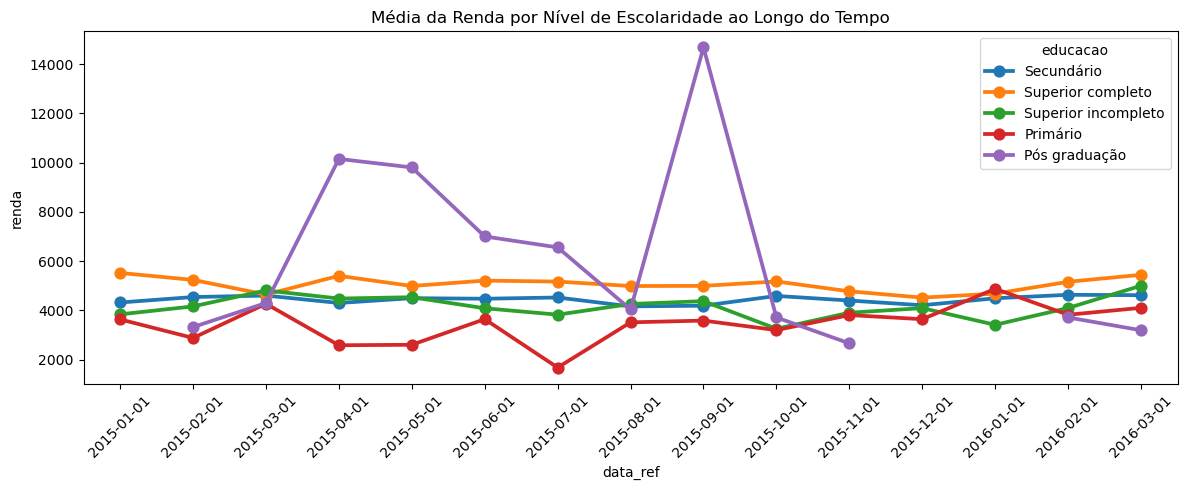

In [34]:
plt.figure(figsize=(12, 5))
sns.pointplot(data=df, x='data_ref', y='renda', hue='educacao', errorbar=None)
plt.title('Média da Renda por Nível de Escolaridade ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A renda tende a aumentar com o nível de escolaridade, com destaque para “Pós-graduação” que tem os maiores picos de renda.

A relação entre escolaridade e renda é intuitiva e consistente, apesar de pequenas flutuações que podem ser causadas por amostras pequenas em certas categorias (como “Pós-graduação”).